$\def \dot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \adot #1#2{\left\langle #1, #2 \right\rangle}$
$\def \cD {\mathcal{D}}$
$\def \cW {\mathcal{W}}$
$\def \bc {\mathbf{c}}$
$\def \bv {\mathbf{v}}$
$\def \bG {\mathbf{G}}$

# A measurement-driven greedy algorithm

We have a solution $u$ (actually $u_h$, i.e. the solution of FEM here, but lets just assume it is ground truth here). 
We're given our measurement space $W_m = \mathrm{span}\{w_1,\ldots,w_m\}$. We have a series of measurements $\langle w_i, u\rangle_V$, and we write $w := P_{W_m} u$, the projection of $u$ in $W_m$.

This algorithm makes a very simple adjustment to the greedy algorithm - it does the argmax search in the $W_m$ projection. Of course as $n \to m$ there is nothing we can do about $\beta(V_n, W_m) \to 0$.

__Remarks:__
 - __Note that $\dot{\cdot}{\cdot} = \dot{\cdot}{\cdot}_{V_h}$ here.__
 - We can __assume that the $\omega_i$ are orthonormal__ as it is a fixed basis.
 - We store $\dot{\omega_i}{v}$ for each $v\in \cD$, so can we di all projections and inner-products in $\mathbb{R}^m$? And furthermore without the need of a Gram matrix $\dot{\phi_i}{\phi_j}$ to do the projection or orthonormalisation of $\phi_i$?
 - Finally, remember that _we can not know anything about $u$ other than $w :=P_{W_m} u$_, and we abuse notation slightly and also write $w=\dot{\omega_i}{u}$ for the vector in $\mathbb{R}^m$ (again, we assume the $\omega_i$ are orthonormal).
 
In the algorithms below we have some dictionary $\cD$ which we take to We have a dictionary $\cD$ of solutions $v(y)$, which we get from generating random points in $y\in[-1,1]^{d}$ ($d=16$ in the experiments below), find the field $a(y)$ and then $v(y) = \frac{u_h(a(y))}{\| u_h(a(y)) \|_{V_h}}$ (i.e. we normalise all elements). 

### Algorithm 1 - Pure Greedy

The first algorithm doesn't depend on $W_m$ at all. Given the dictionary $\cD$ we chose
$$
\phi_1 = {\arg\max}_{v\in\cD} \| v \|
$$
and given $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$, our next choice is
$$
\phi_{n+1} = {\arg\max}_{v\in\cD} \| v - P_{V_n} v \|
$$

### Algorithm 2: Measurement based orthogonal matching pursuit

Now we only work with $w$ and $P_{W_m} v$, hence we can do all calculations in $\mathbb{R}^m$.

Once again the first element $\phi_1$ is chosen as 

$$ \phi_1 = {\arg\max}_{v\in \cD} \adot{w}{v}$$

and given our collection $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$ we have that $P_{W_m} V_n = \mathrm{span}\{P_{W_m} \phi_1,\ldots,P_{W_m} \phi_n\}$, and our next choice is

$$ \phi_{n+1} = {\arg\max}_{v\in \cD} \adot{w - P_{P_{W_m} V_n} w}{\frac{P_{W_m} v}{\|P_{W_m} v\|}}$$

The calculation of $P_{P_{W_m} V_n} w$ is a straightforward solving of a linear problem. We have
$$
\dot{w}{P_{W_m} \phi_i} = \dot{P_{P_{W_m} V_n} w}{P_{W_m} \phi_i}
$$
and we have
$$
P_{P_{W_m} V_n} w = \sum_{i=1}^n c_i P_{W_m} \phi_i  %= \sum_{i=1}^n \sum_{j=1}^m c_i \dot{\omega_j}{\phi_i} \omega_j
$$
so clearly 

$$
\dot{w}{P_{W_m} \phi_j} = \sum_{i=1}^n c_i \dot{P_{W_m} \phi_j}{P_{W_m} \phi_i}.
$$

In addition to this we have that $w = \sum_{k=1}^{m} \dot{u}{\omega_k} \omega_k$ and $P_{W_m} \phi_i = \sum_{k=1}^m \dot{\phi_i}{\omega_k} \omega_k$, and $\dot{P_{W_m} \phi_i}{P_{W_m} \phi_j} = \sum_{k=1}^m \dot{\omega_k}{\phi_j} \dot{\omega_k}{\phi_i}$, hence we solve

$$
\sum_{k=1}^{m} \dot{u}{\omega_k} \dot{\phi_i}{\omega_k} = \sum_{j=1}^n c_j \sum_{k=1}^m \dot{\omega_k}{\phi_j} \dot{\omega_k}{\phi_i}
$$

### Algorithm 3: Measurement based projection pursuit

The first element $\phi_1$ is chosen as 

$$ \phi_1 = {\arg\min}_{v\in \cD} \| w - P_{P_{W_m} v} w \|.$$

we have $\| w - P_{P_{W_m} v} w \|^2 = \| w \|^2 - \| P_{P_{W_m} v} w \|^2 = \| w \|^2 - \frac{\dot{w}{P_{W_m} v}^2}{\dot{P_{W_m} v}{P_{W_m} v}^2} = \| w \|^2 - \frac{\dot{w}{v}^2}{\dot{P_{W_m} v}{P_{W_m} v}^2}$, we see that 
this is equivalent to

$$ \phi_1 = {\arg\max}_{v\in \cD} \frac{\adot{w}{v}}{\adot{P_{W_m} v}{P_{W_m} v}},$$

which again can be performed in $\mathbb{R}^m$.

Now given our collection $V_{n}=\mathrm{span}\{\phi_1, \ldots, \phi_n\}$ our next choice is

$$ \phi_{n+1} = {\arg\min}_{v\in \cD} \| w - P_{P_{W_m} (V_n\oplus \mathbb{R} v)} w \|$$

In terms of vectors $z \in \cW = \{ P_{W_m} \phi : \text{for } v \in \cD \}$ and the space $Z_n = P_{W_m} V_n = \mathrm{span}\{ P_{W_m} \phi_1,\ldots,P_{W_m}\phi_n\} = \mathrm{span}\{ z_1,\ldots,z_n\}$

$$
 z_{n+1} = {\arg\min}_{z\in\cW} \| w - P_{Z_n \oplus \mathbb{R}z} w \|
$$

which is also performed in $\mathbb{R}^m$, but now requires calculating projections for every single candidate vector from the dictionary.

In [1]:
import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import pdb

import sys
sys.path.append("../../")
import pyhilbert as hil
import pyredmod as rm

%matplotlib inline

### Generate the solution $u$ that we want to approximate

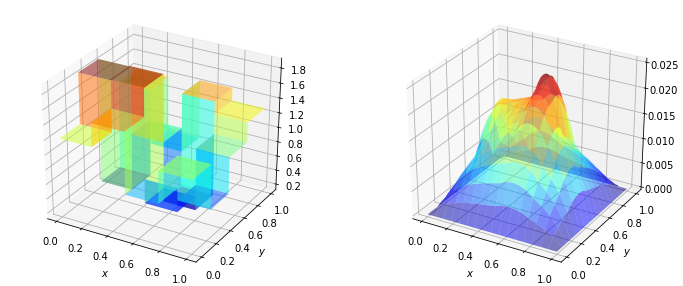

"fig = plt.figure(figsize=(5, 5))\nax = fig.add_subplot(1, 1, 1, projection='3d')\na_loc.plot(ax)#, title='Random field $a(y)$')\nplt.savefig('random_field_py.pdf', bbox_inches='tight', pad_inches=0.1)\nfig = plt.figure(figsize=(5, 5))\nax = fig.add_subplot(1, 1, 1, projection='3d')\nu.plot(ax)#, title='Solution $u(y)$ (labelled $\\mathtt{u}$)')\nplt.savefig('solution_py.pdf', bbox_inches='tight', pad_inches=0.1)\n"

In [36]:
def make_soln(points, field_space, fem_space, a_bar=1.0, c=0.5, f=1.0, verbose=False):
    
    solns = hil.Basis(np.zeros((H1_fine.n, len(points))), space=H1_fine)
    fields = []
    
    for i, p in enumerate(points):
        field = hil.Vector(a_bar + c * p, space=field_space)
        fields.append(field)
        # Then the fem solver (there a faster way to do this all at once? This will be huge...
        fem_solver = hil.DyadicFEMSolver(fem_space = fem_space, rand_field = field, f = f)
        fem_solver.solve()
        solns[:,i] = fem_solver.u
        
    return solns, fields

fem_div = 7
H1_fine = hil.H1DyadicSq(fem_div)
field_div = 2
L2_coarse = hil.L2DyadicSq(field_div)
L2_fine = hil.L2DyadicSq(6)
a_bar = 0.1
c = 2.0
side_n = 2**field_div
side_n_fine = 2**6

def diffusion_pde(points):
    solns, fields = make_soln(points, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c)
    return solns

np.random.seed(5)
a_loc = hil.Vector(values=0.2*np.ones(L2_fine.n), space=L2_fine)
for i in range(1,side_n_fine):
    for j in range(1,side_n_fine):
        f = lambda x, y : np.sin(np.pi*i*x) * np.sin(np.pi*j*y) / ((i+1)*(j+1))
        coeff = 2*np.random.random(1)[0] - 1
        vec = hil.Vector.from_func(f, L2_fine)
        #fig = plt.figure(figsize=(4, 4))
        #ax = fig.add_subplot(1, 1, 1, projection='3d')
        #vec.plot(ax)
        #plt.show()
        #print(vec.values.reshape((L2_coarse.side_len, L2_coarse.side_len)))
        a_loc += coeff * vec #hil.Vector.from_func(f, L2_coarse)
a_loc.values = np.exp(- a_loc.values)
a_loc.values = (a_loc.values - a_loc.values.min()) + 0.001

np.random.seed(3)
u, a = make_soln(np.random.random((1,side_n * side_n)), field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c)
#u, a = make_soln(a_loc.values[np.newaxis,:], field_space=L2_fine, fem_space=H1_fine, a_bar=a_bar, c=c, f=1)
u = u[0]; a = a[0]
                           
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax)#, title='Random field $a(y)$')
ax = fig.add_subplot(1, 2, 2, projection='3d')
u.plot(ax)#, title='Solution $u(y)$ (labelled $\mathtt{u}$)')
plt.show()

"""fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
a_loc.plot(ax)#, title='Random field $a(y)$')
plt.savefig('random_field_py.pdf', bbox_inches='tight', pad_inches=0.1)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
u.plot(ax)#, title='Solution $u(y)$ (labelled $\mathtt{u}$)')
plt.savefig('solution_py.pdf', bbox_inches='tight', pad_inches=0.1)
"""

### Generate the basis $W_m$ of randomly placed local averages

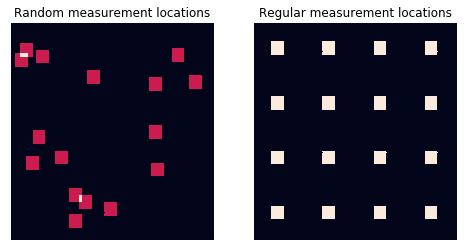

In [47]:
# local_width is the width of the measurement squares in terms of FEM mesh squares
width_div = 3
local_width = 2**width_div
spacing_div = 5

Wm_reg, Wloc_reg = rm.make_local_avg_grid_basis(width_div, spacing_div, fem_div, return_map=True)
Wm_reg = Wm_reg.orthonormalise()

m = Wm_reg.n
# We make the ambient spaces for Wm and Vn
np.random.seed(2)

Wm_rand, Wloc = rm.make_local_avg_random_basis(m=m, div=fem_div, width=local_width, return_map=True)
Wm_rand = Wm_rand.orthonormalise()

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
sns.heatmap(Wloc, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
ax.set_title('Random measurement locations')
ax = fig.add_subplot(1, 2, 2)
sns.heatmap(Wloc_reg, xticklabels=False, yticklabels=False, cbar=False, ax=ax)
ax.set_title('Regular measurement locations')
plt.show()

### Generate the dictionary of random snapshots

In [48]:
N = int(1e3)
np.random.seed(1)
dict_params = np.random.random((N, side_n * side_n))
dict_basis, dict_fields = make_soln(dict_params, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c, f=1.0)

In [49]:
Vn_sin = rm.make_sin_basis(div=fem_div, N=8)

np.random.seed(10)
Vn_red_params = np.random.random((m, side_n * side_n))
Vn_red, Vn_red_fields = make_soln(Vn_red_params, field_space=L2_coarse, fem_space=H1_fine, a_bar=a_bar, c=c, f=1.0)

# First 4 dictionary elements $u_i \in \mathcal{D}$

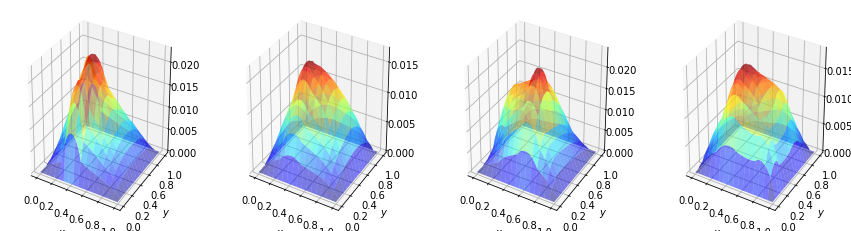

In [50]:
fig = plt.figure(figsize=(15, 4))
for i, v in enumerate(Vn_red[:4]):
    ax = fig.add_subplot(1, 4, i+1, projection='3d')
    v.plot(ax)
plt.show()

In [53]:
w = Wm_reg.project(u)
Vn_red_o = Vn_red.orthonormalise()
Wm_reg_o = Wm_reg.orthonormalise()

lin_est = rm.LinearWorstCaseEstimator(Vn=Vn_red_o, Wm=Wm_reg_o)

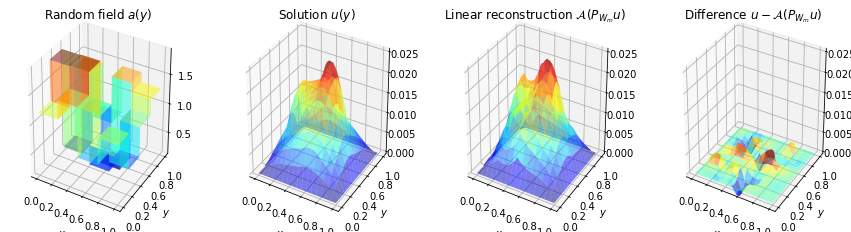

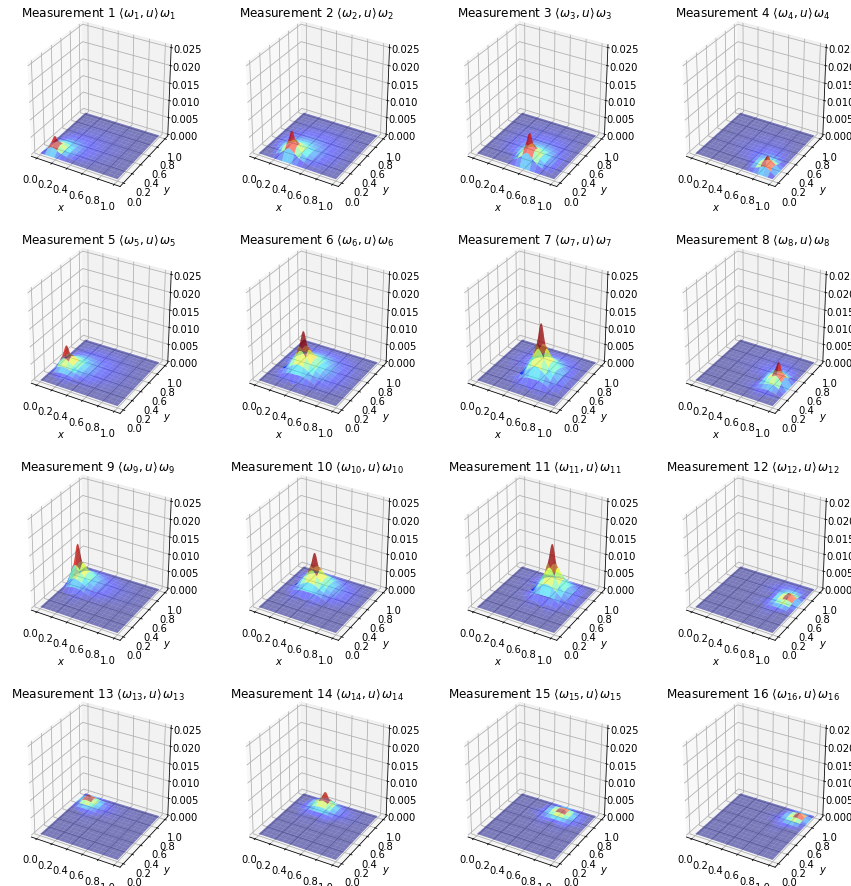

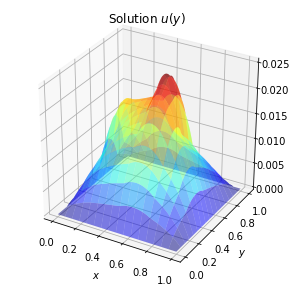

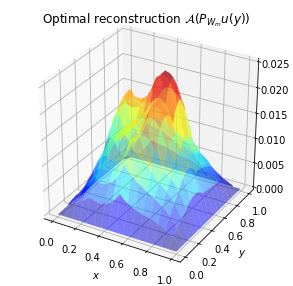

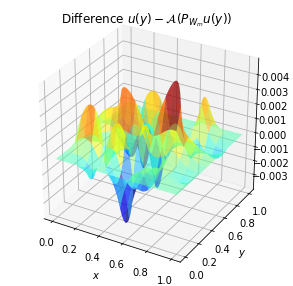

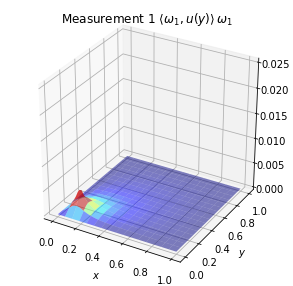

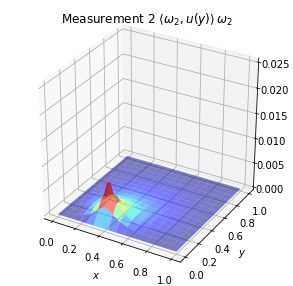

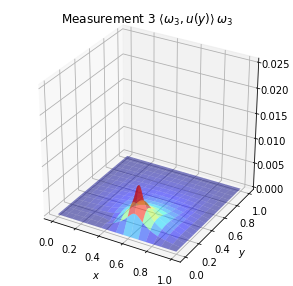

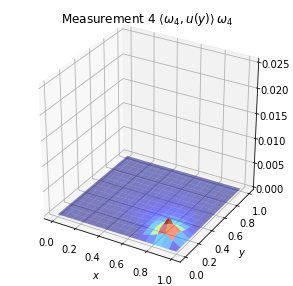

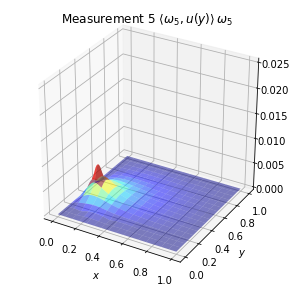

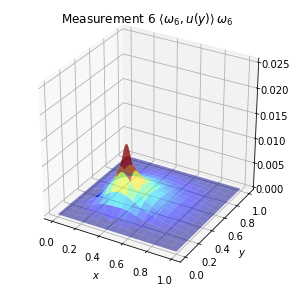

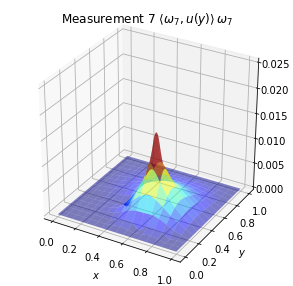

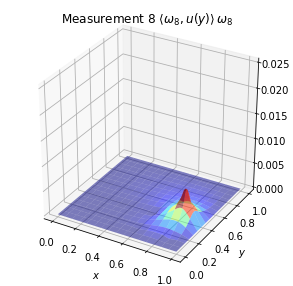

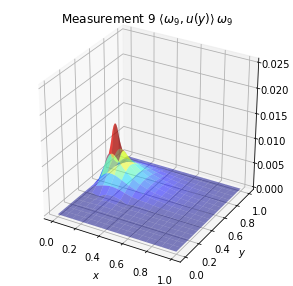

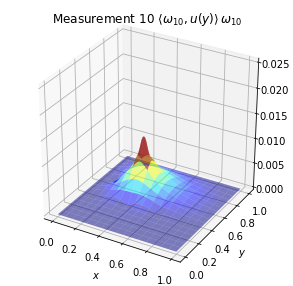

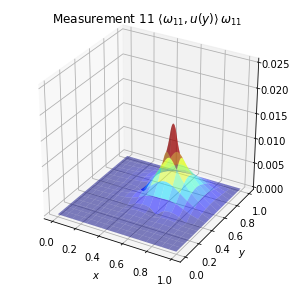

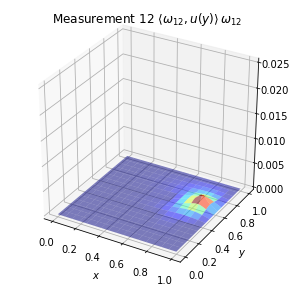

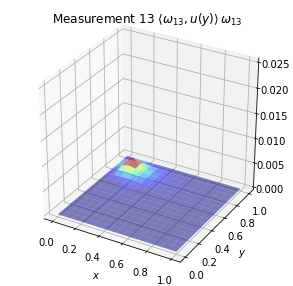

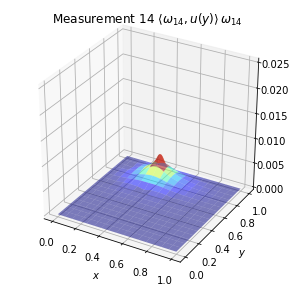

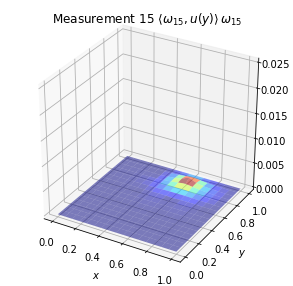

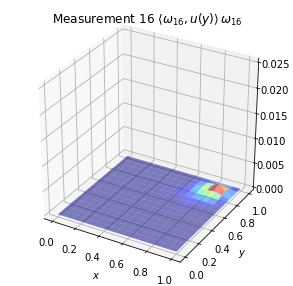

In [59]:
u_star, v_star = lin_est.measure_and_reconstruct(u)

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 4, 1, projection='3d')
a.plot(ax, title=r'Random field $a(y)$')
ax = fig.add_subplot(1, 4, 2, projection='3d')
u.plot(ax, title=r'Solution $u(y)$')
zlim = ax.get_zlim()
ax = fig.add_subplot(1, 4, 3, projection='3d')
u_star.plot(ax, title=r'Linear reconstruction $\mathcal{A}(P_{W_m} u)$')
ax.set_zlim(zlim)
ax = fig.add_subplot(1, 4, 4, projection='3d')
(u - u_star).plot(ax, title=r'Difference $ u - \mathcal{A}(P_{W_m} u)$')
ax.set_zlim(zlim)
plt.show()

fig = plt.figure(figsize=(15, 16))
for i in range(Wm_reg.n):
    ax = fig.add_subplot(4, 4, i+1, projection='3d')
    (Wm_reg[i] * (Wm_reg[i].dot(u))/Wm_reg[i].norm()).plot(ax, title=rf'Measurement {i+1} $\langle \omega_{{{i+1}}}, u \rangle \, \omega_{{{i+1}}}$')
    ax.set_zlim(zlim) #zlim[0], 0.7*zlim[1])


fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
u.plot(ax, title=r'Solution $u(y)$')
plt.savefig('solution_meas.pdf', bbox_inches='tight', pad_inches=0.1)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
u_star.plot(ax, title=r'Optimal reconstruction $\mathcal{A}(P_{W_m} u(y))$')
plt.savefig('reconstruct_meas.pdf', bbox_inches='tight', pad_inches=0.1)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='3d')
(u-u_star).plot(ax, title=r'Difference $u(y) - \mathcal{A}(P_{W_m} u(y))$')
plt.savefig('difference_meas.pdf', bbox_inches='tight', pad_inches=0.1)

for i in range(Wm_reg.n):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    (Wm_reg[i] * (Wm_reg[i].dot(u))/Wm_reg[i].norm()).plot(ax, title=rf'Measurement {i+1} $\langle \omega_{{{i+1}}}, u(y) \rangle \, \omega_{{{i+1}}}$')
    ax.set_zlim(zlim) #zlim[0], 0.7*zlim[1])
    plt.savefig(f'meas_u_{i+1}.pdf', bbox_inches='tight', pad_inches=0.1)

    

In [12]:
g = rm.GreedyApprox(dict_basis, verbose=True)
g.construct_to_n(m)

greedys = [g]

WmVn_pairs = []
WmVn_pair_labels = []
for Wm, Wm_label in zip([Wm_reg, Wm_rand], ['Reg grid', 'Random']):
    for Vn, Vn_label in zip([Vn_sin, Vn_red, g.Vn], ['Sinusoid basis', 'Reduced basis', 'Plain greedy']):
        label = 'Wm: ' + Wm_label + ', Vn: ' + Vn_label
        print(label)
        WmVn_pairs.append([Wm, Vn[:m]])
        WmVn_pair_labels.append(label)
        
    for alg, Vn_label in zip([rm.MeasBasedOMP, rm.MeasBasedPP], ['Meas based OMP', 'Meas based PP']):
        label = 'Wm: ' + Wm_label + ', Vn: ' + Vn_label
        print(label)
        cons = alg(dict_basis, u, Wm, verbose=True)
        cons.construct_to_n(m)
        greedys.append(cons)
        WmVn_pairs.append([Wm, cons.Vn[:m]])
        WmVn_pair_labels.append(label)
        
print(WmVn_pair_labels)

i 	 Selection 	 Sel. criteria
1 : 	 761 	 0.11322344778420701
2 : 	 223 		 0.823112787285846
3 : 	 35 		 0.7335944894325813
4 : 	 868 		 0.7040042049349593
5 : 	 195 		 0.6825824497207938
6 : 	 252 		 0.6542961986359588
7 : 	 246 		 0.6186527450840671
8 : 	 883 		 0.6112289552742611
9 : 	 542 		 0.5846097587237398
10 : 	 714 		 0.5731546592836401
11 : 	 27 		 0.5701290086562325
12 : 	 361 		 0.534881248207176
13 : 	 658 		 0.5108708567810716
14 : 	 454 		 0.48303178440025796
15 : 	 224 		 0.4759940035773524
16 : 	 242 		 0.45817490584816106
17 : 	 727 		 0.4457319963261314
18 : 	 84 		 0.42687118954836656
19 : 	 910 		 0.4061358903259326
20 : 	 881 		 0.4018547732644724
21 : 	 6 		 0.4002194912216157
22 : 	 7 		 0.38177289116851426
23 : 	 429 		 0.37168181815545853
24 : 	 987 		 0.34329835690419835
25 : 	 374 		 0.3190445878906247
26 : 	 267 		 0.3072990959709621
27 : 	 740 		 0.30723546769176313
28 : 	 91 		 0.2957092024040428
29 : 	 739 		 0.28780250907155697
30 : 	 537 		 0.27836856

49 : 	 371 		 8.542492606641348e-08
50 : 	 658 		 4.462662416051076e-08
51 : 	 282 		 3.522098980944572e-08
52 : 	 761 		 2.989185536737906e-08
53 : 	 925 		 2.5326625766876613e-08
54 : 	 478 		 2.2469788861207875e-08
Vn spans all dictionary points at n=54, stopping greedy
Done!
Wm: Random, Vn: Meas based PP
i 	 Selection 	 Sel. criteria
1 : 	 948 	 0.047832916977067014
2 : 	 15 		 0.007401723104794652
3 : 	 640 		 0.005410830549911873
4 : 	 254 		 0.004226740104005359
5 : 	 228 		 0.00331845086567844
6 : 	 998 		 0.0026758051022048655
7 : 	 563 		 0.001937584945235166
8 : 	 43 		 0.0017503289890206425
9 : 	 733 		 0.0016472579451856561
10 : 	 975 		 0.0015202387117738874
11 : 	 823 		 0.0012528547577307467
12 : 	 676 		 0.001118295720526977
13 : 	 192 		 0.0010049176568154214
14 : 	 802 		 0.0008720229433053549
15 : 	 890 		 0.0007086672799016473
16 : 	 996 		 0.0005898568045175401
17 : 	 188 		 0.0005160418774522288
18 : 	 622 		 0.0004643298484221059
19 : 	 75 		 0.00040511450370473

In [14]:
stats = np.zeros([6, len(WmVn_pairs), m])

for j, pair in enumerate(WmVn_pairs):
    Wm = pair[0]
    Vn_big = pair[1].orthonormalise()
    label = WmVn_pair_labels[j]
        
    print('Reconstructions for pair: ' + label)
    for i, n in enumerate(range(2,min(Vn_big.n, m))):
        
        Vn = Vn_big[:n]
        u_p_v = Vn.project(u)
        
        lin_est = rm.LinearWorstCaseEstimator(Vn=Vn, Wm=Wm)
        #FB = BP.make_favorable_basis()
        u_star, v_star = lin_est.measure_and_reconstruct(u)
        
        stats[0, j, n] = (u-u_star).norm()
        stats[1, j, n] = (u - u_p_v).norm()
        stats[2, j, n] = lin_est.beta()
        stats[3, j, n] = lin_est.cond
        stats[4, j, n] = (u_star - v_star).norm()

Reconstructions for pair: Wm: Reg grid, Vn: Sinusoid basis
Reconstructions for pair: Wm: Reg grid, Vn: Reduced basis
Reconstructions for pair: Wm: Reg grid, Vn: Plain greedy
Reconstructions for pair: Wm: Reg grid, Vn: Meas based OMP
Reconstructions for pair: Wm: Reg grid, Vn: Meas based PP
Reconstructions for pair: Wm: Random, Vn: Sinusoid basis
Reconstructions for pair: Wm: Random, Vn: Reduced basis
Reconstructions for pair: Wm: Random, Vn: Plain greedy
Reconstructions for pair: Wm: Random, Vn: Meas based OMP
Reconstructions for pair: Wm: Random, Vn: Meas based PP


5


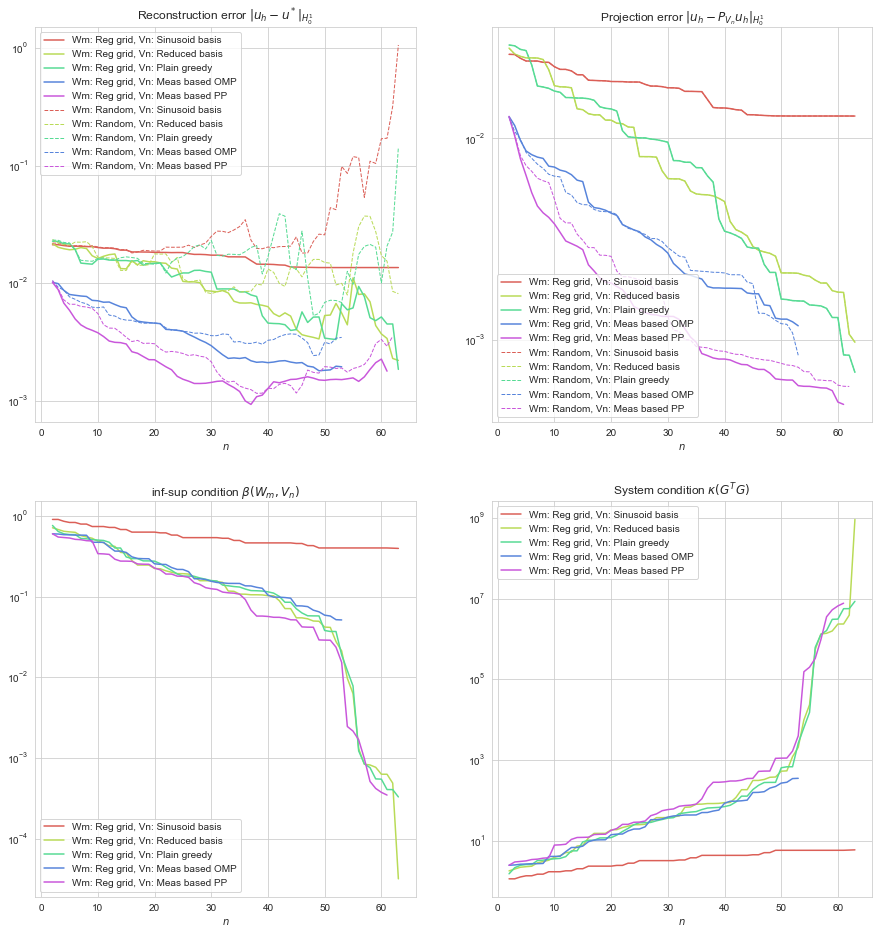

In [18]:
num_res = len(WmVn_pairs)//2
print(num_res)
sns.set_palette('hls', num_res)
cp = sns.color_palette()
sns.set_style('whitegrid')

axs = []
fig = plt.figure(figsize=(15, 16))
axs.append(fig.add_subplot(2, 2, 1, title='Reconstruction error $\| u_h - u^* \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 2, title='Projection error $\| u_h - P_{V_n} u_h \|_{H_0^1}$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 3, title=r'inf-sup condition $\beta(W_m, V_n)$'))
axs[-1].set(yscale="log", xlabel='$n$')
axs.append(fig.add_subplot(2, 2, 4, title=r'System condition $\kappa(G^T G)$'))
axs[-1].set(yscale="log", xlabel='$n$')
#axs.append(fig.add_subplot(3, 2, 2, title='$\| u^* - v^* \|_{H_0^1}$'))
#axs[-1].set(yscale="log", xlabel='$n$')


for j, basis_label in enumerate(WmVn_pair_labels[:num_res]):
    axs[0].plot(range(2, WmVn_pairs[j][1].n), stats[0, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    axs[0].legend(loc=0)
    axs[1].plot(range(2, WmVn_pairs[j][1].n), stats[1, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    axs[1].legend(loc=3)
    axs[2].plot(range(2, WmVn_pairs[j][1].n), stats[2, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    axs[2].legend(loc=3)
    axs[3].plot(range(2, WmVn_pairs[j][1].n), stats[3, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    axs[3].legend(loc=2)
    #axs[4].plot(range(2, WmVn_pairs[j][1].n), stats[4, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    #axs[4].legend(loc=3)

for j, basis_label in enumerate(WmVn_pair_labels[num_res:]):

    axs[0].plot(range(2, WmVn_pairs[j+num_res][1].n), stats[0, j+num_res, 2:WmVn_pairs[j+num_res][1].n], '--', lw=1, label=basis_label, color=cp[j])
    axs[0].legend(loc=0)
    axs[1].plot(range(2, WmVn_pairs[j+num_res][1].n), stats[1, j+num_res, 2:WmVn_pairs[j+num_res][1].n], '--', lw=1, label=basis_label, color=cp[j])
    axs[1].legend(loc=3)
plt.savefig('GreedyMeasSelectionResults.pdf')
plt.show()

### Lets see _where_ these points are chosen to be - right now our best bet is to do a pair grid to reduce to combinations of 2d plots

### Lets look at the distances in $H^1_0$ between $u$ and $\phi_1,\phi_2,...$

Though this doesn't really tell us all that much

Wm: Reg grid, Vn: Sinusoid basis
Wm: Reg grid, Vn: Reduced basis
Wm: Reg grid, Vn: Plain greedy
Wm: Reg grid, Vn: Meas based OMP
Wm: Reg grid, Vn: Meas based PP


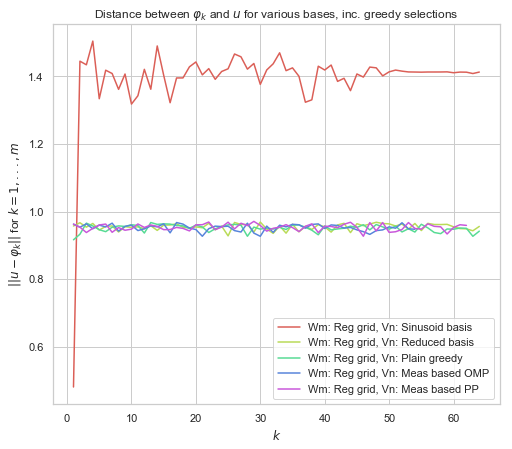

In [18]:
sns.set_palette('hls', 5)
cp = sns.color_palette()
sns.set_style('whitegrid')

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1,1,1)

for j, basis_label in enumerate(WmVn_pair_labels[:5]):
    
    axs[0].plot(range(2, WmVn_pairs[j][1].n), stats[0, j, 2:WmVn_pairs[j][1].n], label=basis_label, color=cp[j])
    axs[0].legend(loc=0)

u_norm = u / u.norm()
Vn_dists = np.zeros((len(WmVn_pairs[:5]), m))
for j, (WmVnPair, label) in enumerate(zip(WmVn_pairs[:5], WmVn_pair_labels[:5])):
    print(label)
    Vn = WmVnPair[1]
    for i, v in enumerate(Vn):
        Vn_dists[j,i] = (v - u_norm).norm()
    ax.plot(np.arange(1,Vn.n+1), Vn_dists[j,:Vn.n], label=label)
ax.set_title(r'Distance between $\varphi_k$ and $u$ for various bases, inc. greedy selections')
ax.set_ylabel(r'$|| u - \varphi_k ||$ for $k=1,...,m$')
ax.set_xlabel(r'$k$')
plt.legend()
plt.show()

(16,)


Text(0.5, 0.98, 'Wm: Reg grid, Vn: Meas based PP')

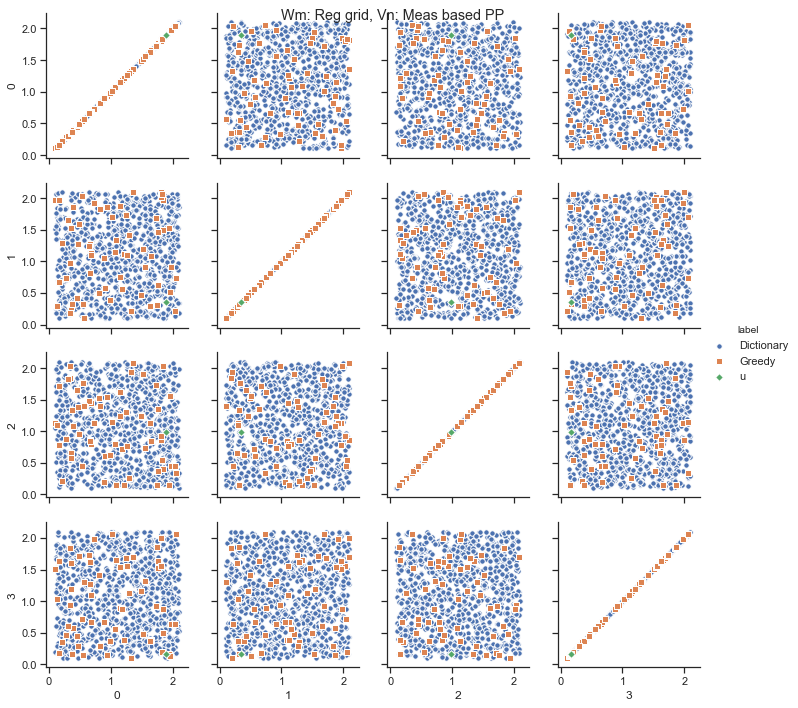

In [25]:
import pandas as pd

sns.set(style="ticks")
print(dict_fields[0].values.shape)
dict_values = np.zeros((len(dict_fields), np.product(dict_fields[0].values.reshape((4,4))[1:3,1:3].shape)))

for i, v in enumerate(dict_fields):
    dict_values[i,:] = v.values.reshape((4,4))[1:3,1:3].flatten()

dict_df = pd.DataFrame(dict_values)
dict_df['label'] = 'Dictionary'

#for greedy in greedys:
greedy_idx = 2
greedy = greedys[greedy_idx]
label = WmVn_pair_labels[greedy_idx+2]

# We plot arbitrary sub-axes in one of those multivariate griddy plot things yay.
greedy_sel_df = pd.DataFrame(dict_values[greedy.dict_sel])
greedy_sel_df['label'] = 'Greedy'
dict_df = dict_df.append(greedy_sel_df)

u_df = pd.DataFrame(a.values.reshape((4,4))[1:3,1:3].reshape((1,4)))
u_df['label'] = 'u'
dict_df = dict_df.append(u_df)


#sns.PairGrid(dict_df)
g = sns.PairGrid(dict_df, hue="label", hue_kws={"marker": ["o", "s", "D"]})
g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=30)
g = g.add_legend()
g.fig.suptitle(label)

### Use tSNE to learn a 2d embedding in which the distribution of distances in the 2d space is as close as possible to the higher dimensional space

In [12]:
dict_basis.update_grammian()

In [13]:
dist_sq = 2.0*(1.0 - dict_basis.G)
dist_sq[dist_sq < 0.0] = 0.0
dist = np.sqrt(dist_sq)

In [14]:
import sklearn.manifold

tsne = sklearn.manifold.TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dist)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 1.507s...
[t-SNE] Computed neighbors for 5000 samples in 238.549s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 1.835925
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.653267
[t-SNE] Error after 300 iterations: 3.045734


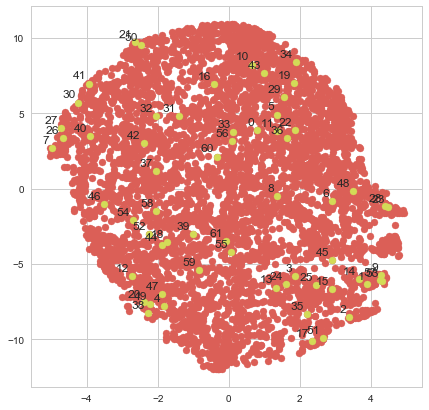

In [15]:
sns.set_palette('hls')
sns.set_style('whitegrid')

fig = plt.figure(figsize=(7,7))

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], marker='o')


greedy = greedys[2]

labels = ['{0}'.format(j) for j in range(greedy.n)] 

plt.scatter(tsne_results[greedy.dict_sel, 0], tsne_results[greedy.dict_sel, 1], marker='o')

for label, x, y in zip(labels, tsne_results[greedy.dict_sel, 0], tsne_results[greedy.dict_sel, 1]):
    plt.annotate(
        label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')



In [16]:
tsne_results

array([[ 0.5101452 , -3.8399715 ],
       [-1.1202846 , -3.926808  ],
       [-1.1104879 , -8.11945   ],
       ...,
       [-0.08028533,  4.6170316 ],
       [ 3.47402   ,  1.4985588 ],
       [-0.9109612 , -9.242318  ]], dtype=float32)